<a href="https://colab.research.google.com/github/ahnjongin/deeplearning/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_3%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST 파일 구조 분석

In [ ]:
import numpy as np
import keras
from tensorflow import keras
from keras.utils import np_utils
from sklearn.linear_model import LinearRegression

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
for r in range(28):
  for c in range(28):
    if(x_test[0][r][c]!=0):
      print("ㅁ",end=' ')
    else:
      print("  ",end=' ')
    print()

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

MNIST 데이터로 손글씨 인식 - 머신러닝

In [ ]:
#내가 사용할 모델에 맞게 데이터의 구조와 값을 수정
x_train2=x_train.reshape(-1,28*28) #2차원 형태의 독립변수 구조를 1차원 형태의 독립변수 구조로 변경
x_train.shape, x_train2.shape

((60000, 28, 28), (60000, 784))

In [ ]:
x_test2 = x_test.reshape(-1,28*28)

In [ ]:
y_train2 = np_utils.to_categorical(y_train)
y_train[0], y_train2[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [ ]:
y_test2 = np_utils.to_categorical(y_test)

In [ ]:
mv=min(x_train2[0])
Mv=max(x_train2[0])
mv,Mv

(0, 255)

In [ ]:
x_train3=x_train2/255.0
x_test3=x_test2/255.0
mv2=min(x_train3[0])
Mv2=max(x_train3[0])
mv2,Mv2

(0.0, 1.0)

In [ ]:
#선형 회귀 모델 생성
lr=LinearRegression()

In [ ]:
#학습
lr.fit(x_train3,y_train2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#예측
result = lr.predict(x_test3)

In [ ]:
result[0],y_test[0],y_test2[0]

(array([ 0.02770996,  0.00618298,  0.10690041,  0.10259679, -0.11571961,
        -0.01106006, -0.01830345,  0.90581385, -0.08378306,  0.08020427]),
 7,
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [ ]:
res=[]
for r in range(len(result)):
  res.append(np.argmax(result[r]))  #제일 큰 값이 있는 인덱스를 얻어와서 res에 추가
res2=np.array(res)
res2,y_test


(array([7, 2, 1, ..., 4, 5, 6]), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

군집화

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.DataFrame(columns=['x','y'])
df.loc[0]=[1,4]
df.loc[1]=[1,3]
df.loc[2]=[2,5]
df.loc[3]=[2,2]
df.loc[4]=[1,12]
df.loc[5]=[2,13]
df.loc[6]=[3,12]
df.loc[7]=[4,6]
df.loc[8]=[4,8]
df.loc[9]=[5,7]
df

,x,y
0,1,4
1,1,3
2,2,5
3,2,2
4,1,12
5,2,13
6,3,12
7,4,6
8,4,8
9,5,7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


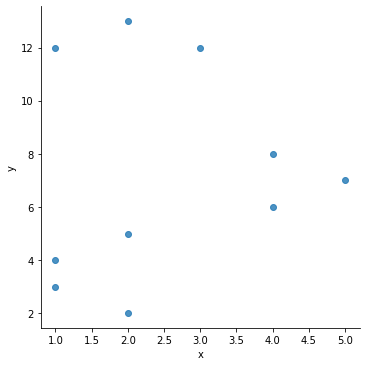

In [ ]:
#테스트 데이터를 도면에 그리기
sns.lmplot('x','y', data=df, fit_reg=False)

In [ ]:
data_points=df.values
data_points

array([[1, 4],
       [1, 3],
       [2, 5],
       [2, 2],
       [1, 12],
       [2, 13],
       [3, 12],
       [4, 6],
       [4, 8],
       [5, 7]], dtype=object)

In [ ]:
#KMeans 모델로 군집화
md = KMeans(n_clusters=3) #n_clusters는 군집 개수
kmeans = md.fit(data_points)

In [ ]:
df['label']=kmeans.labels_
df

,x,y,label
0,1,4,0
1,1,3,0
2,2,5,0
3,2,2,0
4,1,12,1
5,2,13,1
6,3,12,1
7,4,6,2
8,4,8,2
9,5,7,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


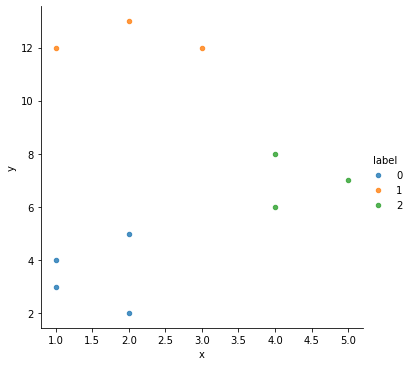

In [ ]:
#군집별 도면으로 그리기
sns.lmplot('x','y',data=df, fit_reg=False, scatter_kws={"s":20},hue='label')
plt.show()

#딥러닝-선형 회귀를 이용한 손글씨 인식

In [ ]:
from keras import layers,models

In [ ]:
#선형 회귀 모델 생성
model=models.Sequential()

In [ ]:
model.add(layers.Dense(100,activation='relu',input_shape=(784,)))  #입력계층: 784 -> 100
model.add(layers.Dense(28,activation='relu'))  #은닉 계층: 100->28
model.add(layers.Dense(10,activation="softmax"))  #출력 계층: 28->10

In [ ]:
#모델을 동작 가능한 상태로 만들기- 컴파일
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#학습
model.fit(x_train3,y_train2, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 17s 2ms/step - loss: 0.4664 - accuracy: 0.8645
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1217 - accuracy: 0.9644
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0839 - accuracy: 0.9745
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9797
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9847
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0407 - accuracy: 0.9866
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9892
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217 - accuracy: 0.9927
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.02

In [ ]:
x_test3.shape

(10000, 784)

In [ ]:
#학습한 것을 가지고 실제 테스트를 하여 평가해보자
score = model.evaluate(x_test3,y_test2)
score

313/313 [==============================] - 1s 1ms/step - loss: 0.1074 - accuracy: 0.9781


[0.10737800598144531, 0.9781000018119812]

독버섯인지 판별하기

In [ ]:
import pandas as pd
from sklearn import svm,metrics
import random

In [ ]:
def read_data(fname):
  mr = pd.read_csv(fname, header=None) #CSV 파일을 읽어오세요
  train_label=[]  #학습에 사용할 종속 변수 컬렉션
  test_label=[]  #테스트에 종속 변수를 보관할 컬렉션

  train_data=[]  #학습에 사용할 독립 변수 컬렉션
  test_data=[]  #테스트에 사용할 독립 변수를 보관할 컬렉션
  label=[] #종속 변수를 보관할 컬렉션
  data=[]  #독립 변수를 보관할 컬렉션
  for ri, row in mr.iterrows(): #로딩한 데이터를 한 줄씩 해석하는 것을 반복하여라
    r=random.randint(1,5)  #1이 나오면 테스트 데이터로, 그 외의 값이 나오면 학습 데이터로 사용하자
    if r ==1:
      test_label.append(ord(row.loc[0]))
    else:
      train_label.append(ord(row.loc[0]))
    
    ot=[]
    for v in row.loc[1:]:  #인덱스 1에서 맨 마지막 요소까지 반복하여라.
      ot.append(ord(v))  #데이터 v를 정수 형식으로 변환하여 ot컬렉션에 추가하여라.
    if r==1:
      test_data.append(ot)
    else:
      train_data.append(ot)
  return train_data, train_label, test_data, test_label

In [ ]:
tr_d, tr_l, te_d, te_l = read_data("/content/drive/MyDrive/딥러닝캠프/mushrooms.csv")

In [ ]:
tr_darr=np.array(tr_d[0])
tr_darr

array([120, 115, 121, 116,  97, 102,  99,  98, 107, 101,  99, 115, 115,
       119, 119, 112, 119, 111, 112, 110, 110, 103])

In [ ]:
len(tr_d), len(tr_l), len(te_d), len(te_l)

(6450, 6450, 1674, 1674)

In [ ]:
#모델 생성
clf=svm.SVC()

In [ ]:
#학습
clf.fit(tr_d,tr_l)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#예측
result = clf.predict(te_d)

In [ ]:
#비교
rarr = np.array(result)
tearr = np.array(te_l)

In [ ]:
#정확도를 계산하자
score = metrics.accuracy_score(result,te_l)
score

0.9958183990442055